# 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1, size=100)

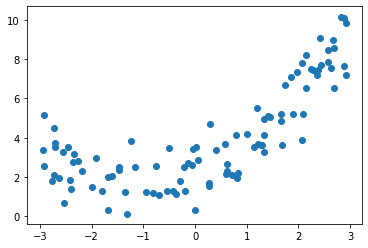

In [3]:
plt.scatter(x, y)

### 1. 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.5492152904934142

In [6]:
y_predict = lin_reg.predict(X)

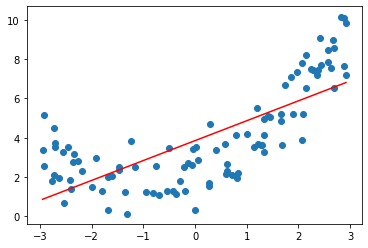

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

**使用均方误差来描述拟合程度**

In [8]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

2.8696460021163155

### 2. 使用多项式回归

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

**当 degree 取 2 时**

In [10]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [11]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0235268485735454

**显然此时比线性回归拟合程度更高（均方差更小）**

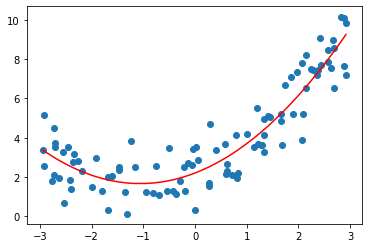

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

**degree = 10 时**

In [13]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

0.9929380973578361

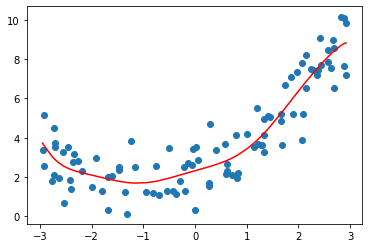

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')

**degree = 100 时**

In [15]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.5497618575574699

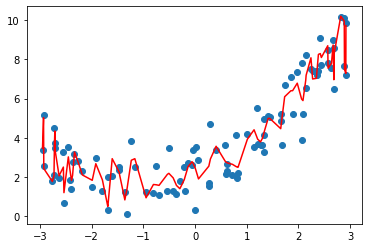

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

- 可以看出，随着degree的值越大，拟合的程度**越来越高**
- 但是此时模型已经不能很好预测数据，称为**过拟合**

### 3. train-test-split的意义

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

#### 线性回归

In [18]:
lin_reg  = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared = mean_squared_error(y_test, y_predict)
score = lin_reg.score(X_test, y_test)
print("mean_squared: ", mean_squared)
print("score: ", score)

mean_squared:  3.0138859332499557
score:  0.526634907968638


#### 多项式回归

In [19]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared = mean_squared_error(y_test, y2_predict)
score = poly2_reg.score(X_test, y_test)
print("mean_squared: ", mean_squared)

mean_squared:  1.4330745991544904


显然在degree=2时的模型的泛化能力强于线性回归**(对数据的预测效果更好)**

**当 degree 取 10 时**

In [20]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared = mean_squared_error(y_test, y10_predict)
score = poly10_reg.score(X_test, y_test)
print("mean_squared: ", mean_squared)

mean_squared:  1.7032422970254841


In [21]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared = mean_squared_error(y_test, y100_predict)
poly100_reg.score(X_test, y_test)
print("mean_squared: ", mean_squared)

mean_squared:  228258223189753.47


- 结合上面可以看出，degree越高，对训练数据拟合的越好，但是对测试数据集预测的能力越低（均方误差越来越高）
- 即模型的泛化能力越差

[![8lmR2j.md.png](https://s1.ax1x.com/2020/03/14/8lmR2j.md.png)](https://imgchr.com/i/8lmR2j)

### 4. 学习曲线

- 随着学习的数据越多，对训练数据与测试数据的拟合程度的变化曲线

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [23]:
X_train.shape

(75, 1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

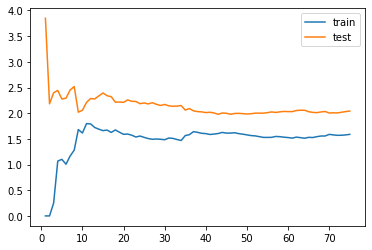

In [25]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()

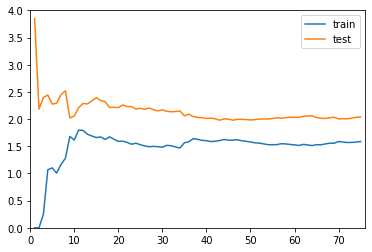

In [26]:
# 封装函数
def plot_learning_curve(algorithm, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algorithm.fit(X_train[:i], y_train[:i])

        y_train_predict = algorithm.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algorithm.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.legend()

plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [27]:
# 多项式回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

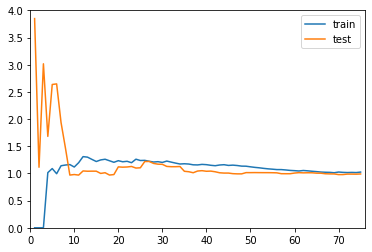

In [28]:
poly2_reg = PolynomialRegression(degree=2)
# 绘制学习曲线
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

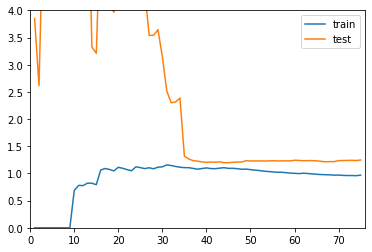

In [29]:
poly2_reg = PolynomialRegression(degree=8)
# 绘制学习曲线
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

[![8lmgPg.md.png](https://s1.ax1x.com/2020/03/14/8lmgPg.md.png)](https://imgchr.com/i/8lmgPg)
[![8lmLRJ.md.png](https://s1.ax1x.com/2020/03/14/8lmLRJ.md.png)](https://imgchr.com/i/8lmLRJ)